#In this notebook , we are going to cover some of the most fundamental topics oof tensor through tensorflow


we are going to cover:
*introducttion to tensors

* getting info from tensors
* manipulating tensors
* manipulating tensors
* tensor numpy
* using @tf.function
* using gpus with tensorflow
* exersise


In [ ]:
# this will be the main file from now 
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
Z = 100 + 200
print(Z)

300


In [ ]:
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
scalar.ndim

0

In [ ]:
vector = tf.constant([1,2,3])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
matrix = tf.constant([[1, 2, 3],[4, 5, 6]],dtype=tf.float64)
matrix

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]])>

In [ ]:
matrix.shape

TensorShape([2, 3])

In [ ]:
matrix.ndim

2

In [ ]:
matrix1=tf.constant([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]],)
matrix1

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [ ]:
matrix1.shape
matrix.ndim

2

In [ ]:
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [ ]:
tensor.ndim

3

In [ ]:
 random1 = tf.random.Generator.from_seed(42)
 random1 = random1.uniform(shape=(3,2))
 random2 = tf.random.Generator.from_seed(42)
 random2 = random2.uniform(shape=(3,2))
random1,random2, random1 == random2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.7493447 , 0.73561966],
        [0.45230794, 0.49039817],
        [0.1889317 , 0.52027524]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.7493447 , 0.73561966],
        [0.45230794, 0.49039817],
        [0.1889317 , 0.52027524]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

In [ ]:

#notshuffeled = tf.random.Generator.from_seed(42)

notshuffeled=tf.constant([[1, 2],
                          [3, 4],
                          [5, 6]])
#shuffeling
#tf.random.set_seed(2)
tf.random.shuffle(notshuffeled,seed=2)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
import numpy as np
arrayA=np.arange(1,31,dtype=np.int64)
arrayA
b=tf.constant(arrayA,shape=(2,5,3))
arrayA,b

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <tf.Tensor: shape=(2, 5, 3), dtype=int64, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12],
         [13, 14, 15]],
 
        [[16, 17, 18],
         [19, 20, 21],
         [22, 23, 24],
         [25, 26, 27],
         [28, 29, 30]]])>)

In [ ]:
rank4tensor = tf.zeros(shape=(2,3,4,5))
rank4tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank4tensor.dtype,rank4tensor.shape[3],rank4tensor[0,1],tf.size(rank4tensor).numpy()

(tf.float32, 5, <tf.Tensor: shape=(4, 5), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32)>, 120)

In [ ]:
identity = tf.eye(5)
from scipy import sparse
print(identity)
sparseidentity = sparse.csr_matrix(identity)
print(sparseidentity)


tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [ ]:
x = tf.random.Generator.from_seed(42)
x = tf.random.normal([2,3,4])
x,tf.size(x).numpy(),tf.rank(x)

(<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
 array([[[-2.4067285 , -0.00646796, -0.9039262 ,  1.1002902 ],
         [ 0.22200632,  0.49651656,  0.34624416, -0.9590523 ],
         [ 1.9896741 ,  1.1026995 ,  1.4052418 ,  0.42131725]],
 
        [[-1.2836932 , -0.48254594, -2.5896597 ,  0.78130114],
         [-1.9857194 , -0.8815387 , -1.1555331 , -0.6989862 ],
         [-0.674805  ,  1.1849552 , -1.0128744 , -0.9253034 ]]],
       dtype=float32)>, 24, <tf.Tensor: shape=(), dtype=int32, numpy=3>)

In [ ]:
data = np.ones(4)
row = np.arange(4)
col = np.arange(4)
x = sparse.coo_matrix((data,(row,col)))
data,row,
print(x)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

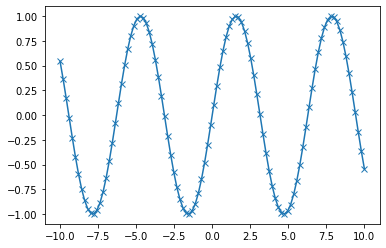

In [ ]:
import matplotlib.pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10,10,100)
print(x)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

In [ ]:
z = np.random.randn()
z
# print(sum(z))

-2.2722398001460653

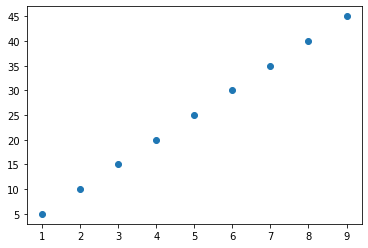

In [ ]:
import matplotlib.pyplot as plt
X = tf.constant(np.arange(1,10,1))
y = tf.constant(np.arange(5,50,5))
plt.scatter(X,y);

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="elu"),
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])
model.fit(X,y,epochs = 50)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1/1 [==============================] - 1s 685ms/step - loss: 24.2377 - mae: 24.2377
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 23.2626 - mae: 23.2626
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 22.2811 - mae: 22.2811
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 21.2888 - mae: 21.2888
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 20.2793 - mae: 20.2793
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 19.2481 - mae: 19.2481
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 18.1916 - mae: 18.1916
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 17.1060 - mae: 17.1060
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 15.9866 - mae: 15.9866
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 14.8289 - mae: 14.8289
Epoch 11/50
1/1 [==============================] - 0s 26ms/step - 

In [ ]:
X,y

(<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>,
 <tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])>)

In [ ]:
model.predict([10])

array([[47.583473]], dtype=float32)

In [ ]:
x = int(input())
y = max(0,x) # elu fnction
print(y)

87
87


In [ ]:
model.predict([5.5])

array([[26.650555]], dtype=float32)

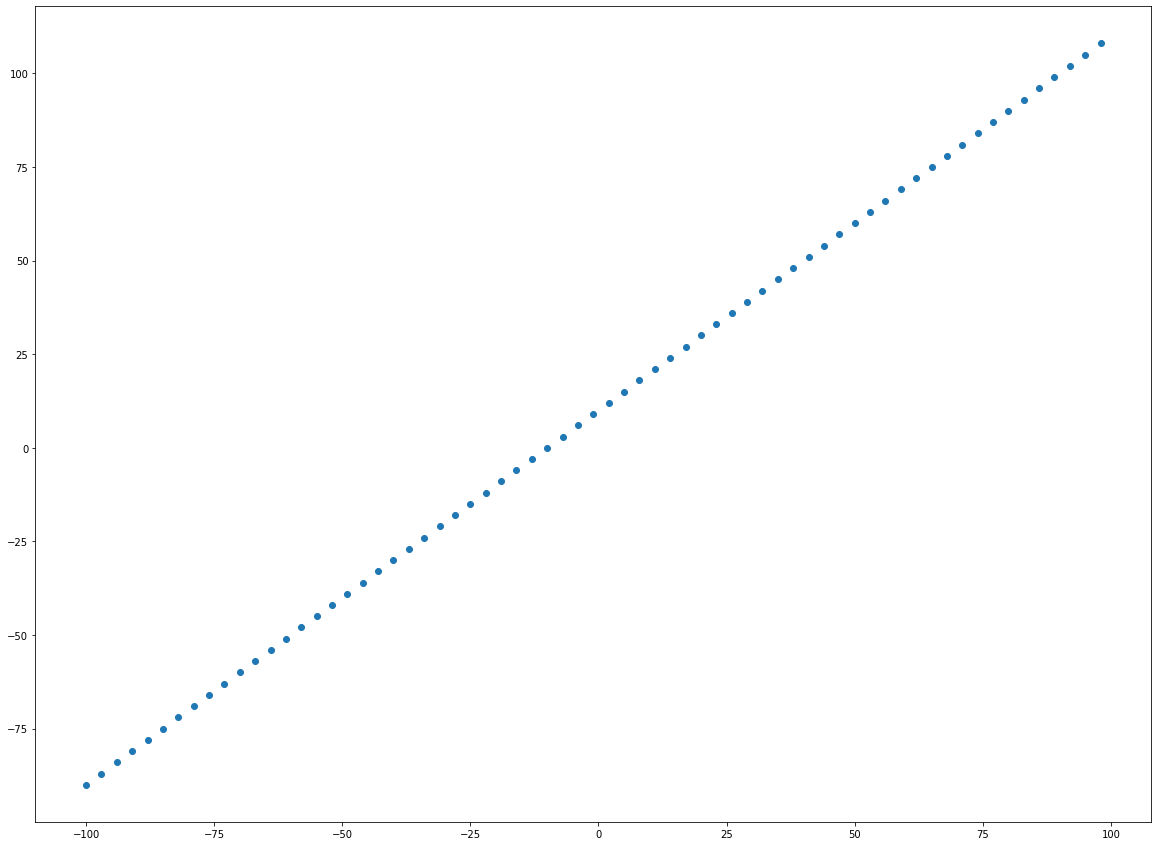

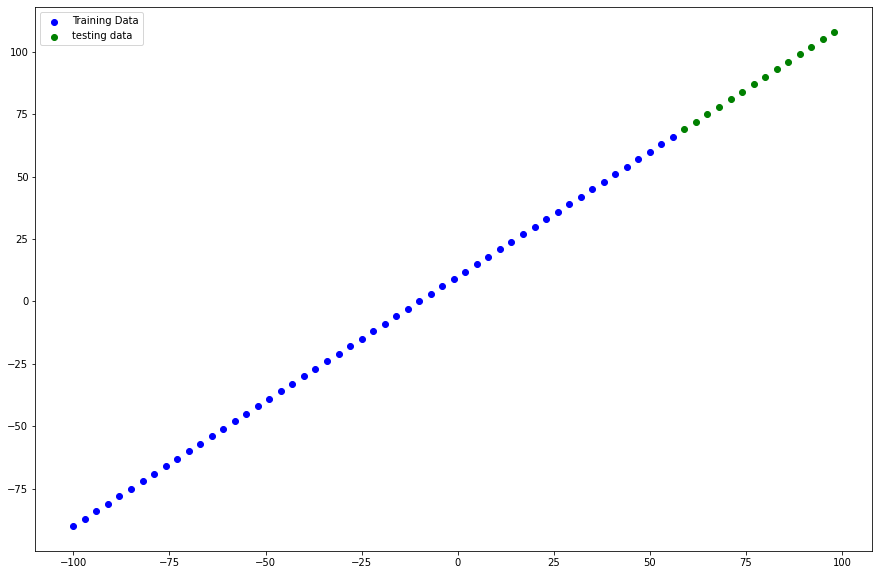

In [ ]:
x = tf.range(-100,100,3)
y = x+10
x,y
x_train = x[:53]
x_test = x[53:]
y_train = y[:53]
y_test = y[53:]
plt.figure(figsize=(20,15))
plt.scatter(x,y)
plt.figure(figsize=(15,10))
plt.scatter(x_train,y_train,c='b',label = "Training Data")
plt.scatter(x_test,y_test,c='g',label = "testing data")
plt.legend()

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3,input_shape = [2]),
  tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
           optimizer = tf.keras.optimizers.SGD(),
           metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


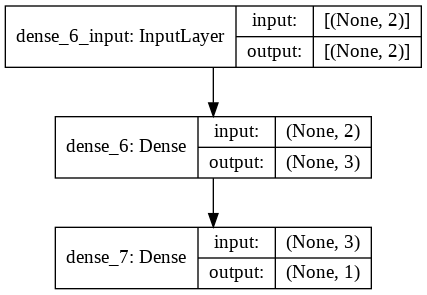

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model,show_shapes=True)